In [ ]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
missing_location = [Point(40,70)] ## YOU CODE GOES HERE ##

## DO NOT MODIFY THE CODE BELOW ##
# The LineString object in map that is missing in the above list
missing_line = [LineString([Point(30,65), Point(65, 65)])]
## END OF DO NOT MODIFY ##

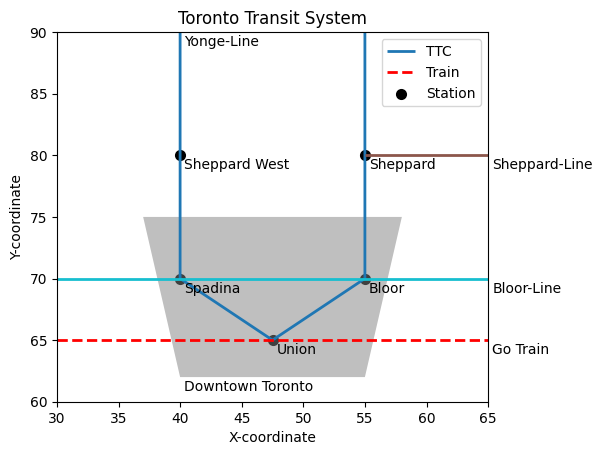

In [ ]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', 'Train', 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name  + locations_name + polygon_name,
                       'properties': line_properties + location_properties + polygon_properties,
                       'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

In [ ]:
### YOUR CODE HERE ###

if isinstance('Downtown Toronto', Polygon):
    geom_area = 'Downtown Toronto'
else:
    for index, row in gdf.iterrows():
        if row['name'] == 'Downtown Toronto':
            geom_area = row['geometry']
            break

for index, row in gdf.iterrows():
    if isinstance(row['geometry'], Point) and geom_area.contains(row['geometry']):
        print(row['name'])

Spadina
Bloor
Union


In [ ]:
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]
### YOUR CODE HERE ###

for location in user_location:
    if isinstance(location, Point):
        geom_location = location
    else:
        for i, row in gdf.iterrows():
            if row['name'] == location:
                geom_location = row['geometry']
                break

    for i, row in gdf.iterrows():
        if row['name'] == 'Downtown Toronto':
            geom_area = row['geometry']
            break

    is_within = geom_area.contains(geom_location)
    print(f'{location} : {is_within}')

POINT (40 80) : False
POINT (40 70) : True
POINT (55 80) : False
POINT (55 70) : True
POINT (47.5 65) : True


In [ ]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
#If you encounter a very long runtime, please check if 'replace /content/...... [y]es, [n]0 .....' is displayed in the output
#If so, it means the file already exists in the directory. Please completely restart the colab runtime (google it if you do not know how) and run the code again
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2025-03-24 00:36:13--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2025-03-24 00:36:14--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.02s   

2025-03-24 00:36:14 (146 MB/s) - ‘cb_2018_us_state_500k.

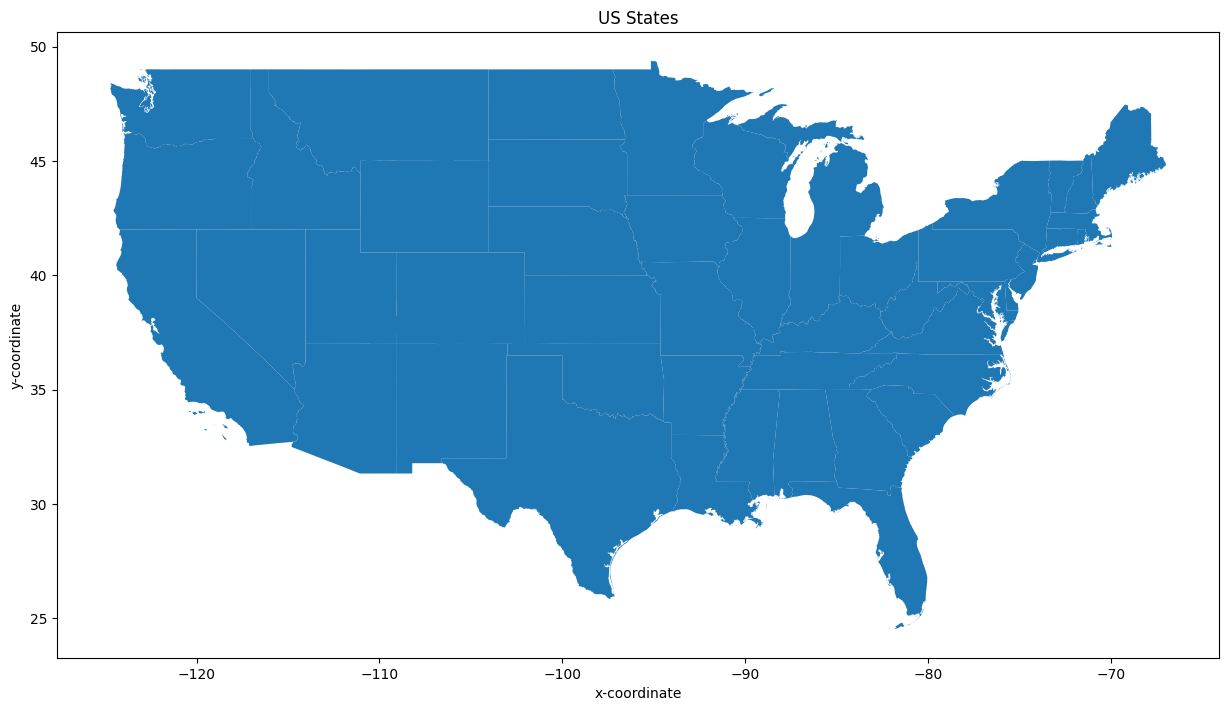

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###
gdf_states = gpd.read_file(shape_file_location) # read the shapefile as a GeoDataFrame as gdf_states

### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]


### YOUR CODE HERE ###
# plot the map
gdf_states.plot(figsize=(15, 10))
plt.title('US States')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

# check CRS
gdf_states.crs

**Your Text Answer:** CRS:EPSG:4269

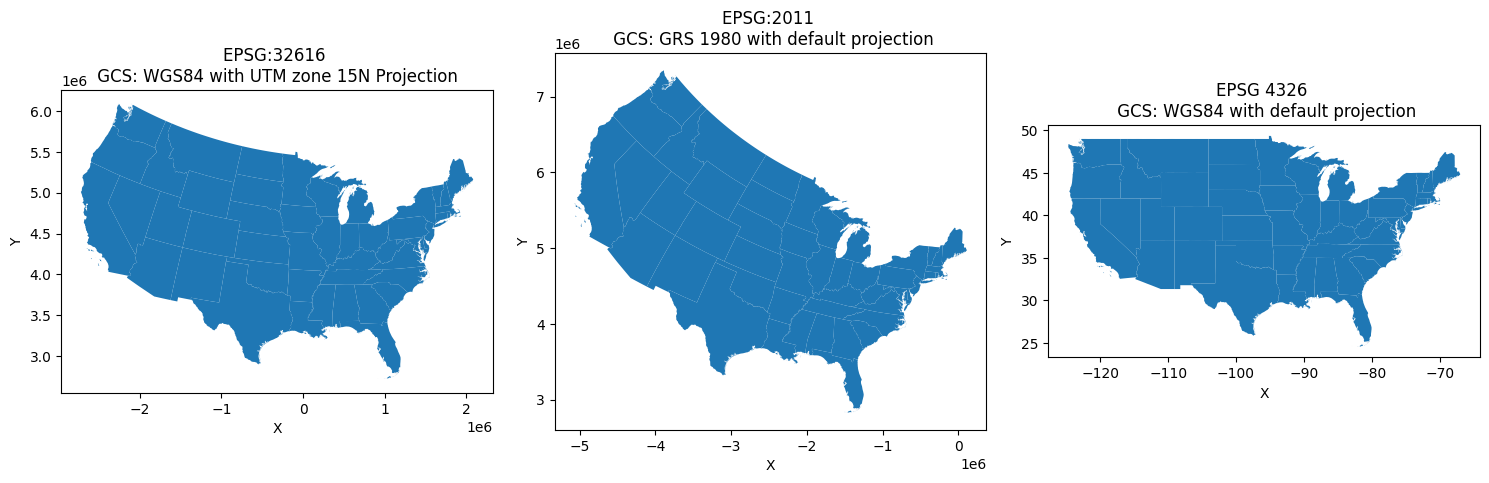

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax.flatten()

### YOUR CODE HERE ###

randomly_selected = [
    ("EPSG:32616 \n GCS: WGS84 with UTM zone 15N Projection ", gdf_states.to_crs('EPSG:32616')),
    ("EPSG:2011 \n GCS: GRS 1980 with default projection", gdf_states.to_crs('EPSG:2011')),
    ("EPSG 4326 \n GCS: WGS84 with default projection", gdf_states.to_crs('EPSG:4326'))
    ]

for i, (title, gdf) in enumerate(randomly_selected):
    gdf.plot(ax=ax[i], figsize=(5, 5))
    ax[i].set_title(title)
    ax[i].set_xlabel("X")
    ax[i].set_ylabel("Y")

plt.tight_layout()
plt.show()

**Your Text Answer**: I'd use EPSG 32626 since it's the most realistic and takes into account possible distortion that you may see in other projections.

In [ ]:
### YOUR CODE HERE ###
print("Number oof vector shapes: "+ str(gdf_states['Province_State'].shape[0]))

polygon = gdf_states.geometry[4]

print('Shape:', polygon.geom_type)
print('Points:', len(polygon.exterior.xy[0]))
print('Area:', polygon.area)

Number oof vector shapes: 49
Shape: Polygon
Points: 3880
Area: 6.493879726220489


In [ ]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')  # read the shapefile as a GeoDataFrame as gdf_states
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


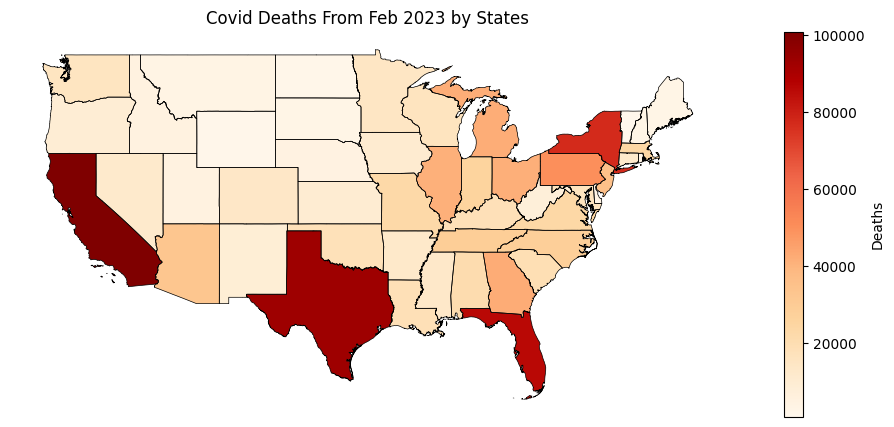

In [ ]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###
# DataFrame 'death_by_month' contains the dataset for this problem
gdf_death = gdf_states[['Province_State', 'geometry']].merge(death_by_month, on='Province_State') #Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'. The merged GeoDataFrame should be stored in 'gdf_death'

current_month = gdf_death[['Province_State','02-2023','geometry','Population']]

fig,ax  = plt.subplots(1, 1, figsize=(15, 5))

current_month.plot(ax = ax,figsize=(10, 5), column='02-2023',
                         legend=True,
                         legend_kwds={"label": "Deaths"},
                         cmap='OrRd')

gdf_death.boundary.plot(ax = ax,color='k', linewidth=0.5)

plt.title('Covid Deaths From Feb 2023 by States')
plt.axis('off')


plt.show()

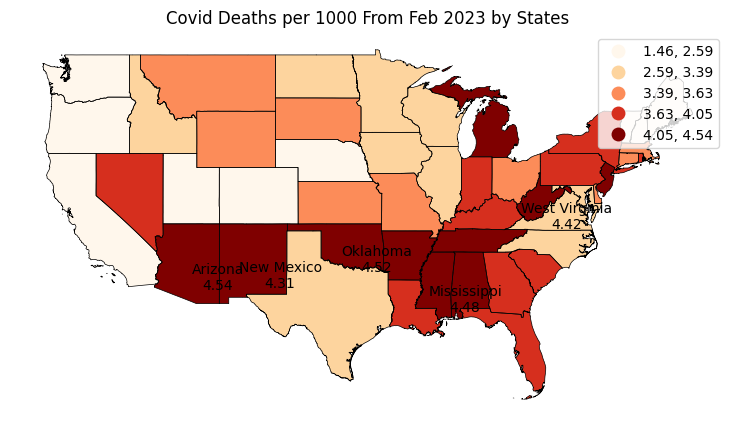

In [ ]:
### YOUR CODE HERE ###

current_month['Density'] = current_month['02-2023'] / current_month['Population'] * 1000

fig,ax  = plt.subplots(1, 1, figsize=(15, 5))

current_month.plot(ax = ax,figsize=(10, 5),
                        column = 'Density',
                         legend=True,
                         cmap='OrRd',
                        scheme='quantiles')

gdf_death.boundary.plot(ax = ax,color='k', linewidth=0.5)

plt.title('Covid Deaths per 1000 From Feb 2023 by States')

max_cases_state = current_month.nlargest(5, 'Density')
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Density']):
    ax.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center')

plt.axis('off')

plt.show()

**Your Text Answer** The adjusted chloropleth shows states like Arizona that have a very high death rate per 1000. The results differed from the previous chloropleth since now we weigh the overal population against the amount of deaths. The results per 1000 are a better representation of places with a relatively high amount of covid cases.


In [ ]:
### YOUR CODE HERE ###

cols = [col for col in gdf_death.columns if col not in ['Province_State', 'geometry', 'Population']]
gdf_new = gdf_death[cols].diff(axis=1).clip(lower=0)
gdf_new.iloc[:, 0] = gdf_death[cols[0]]

gdf_new = gdf_death[['Province_State', 'geometry', 'Population']].join(gdf_new)
gdf_new = gpd.GeoDataFrame(gdf_new)

months_2021 = [col for col in gdf_new.columns if '2021' in col and col not in ['geometry', 'Province_State', 'Population']]
months_2021 = sorted(months_2021, key=lambda x: pd.to_datetime(x))

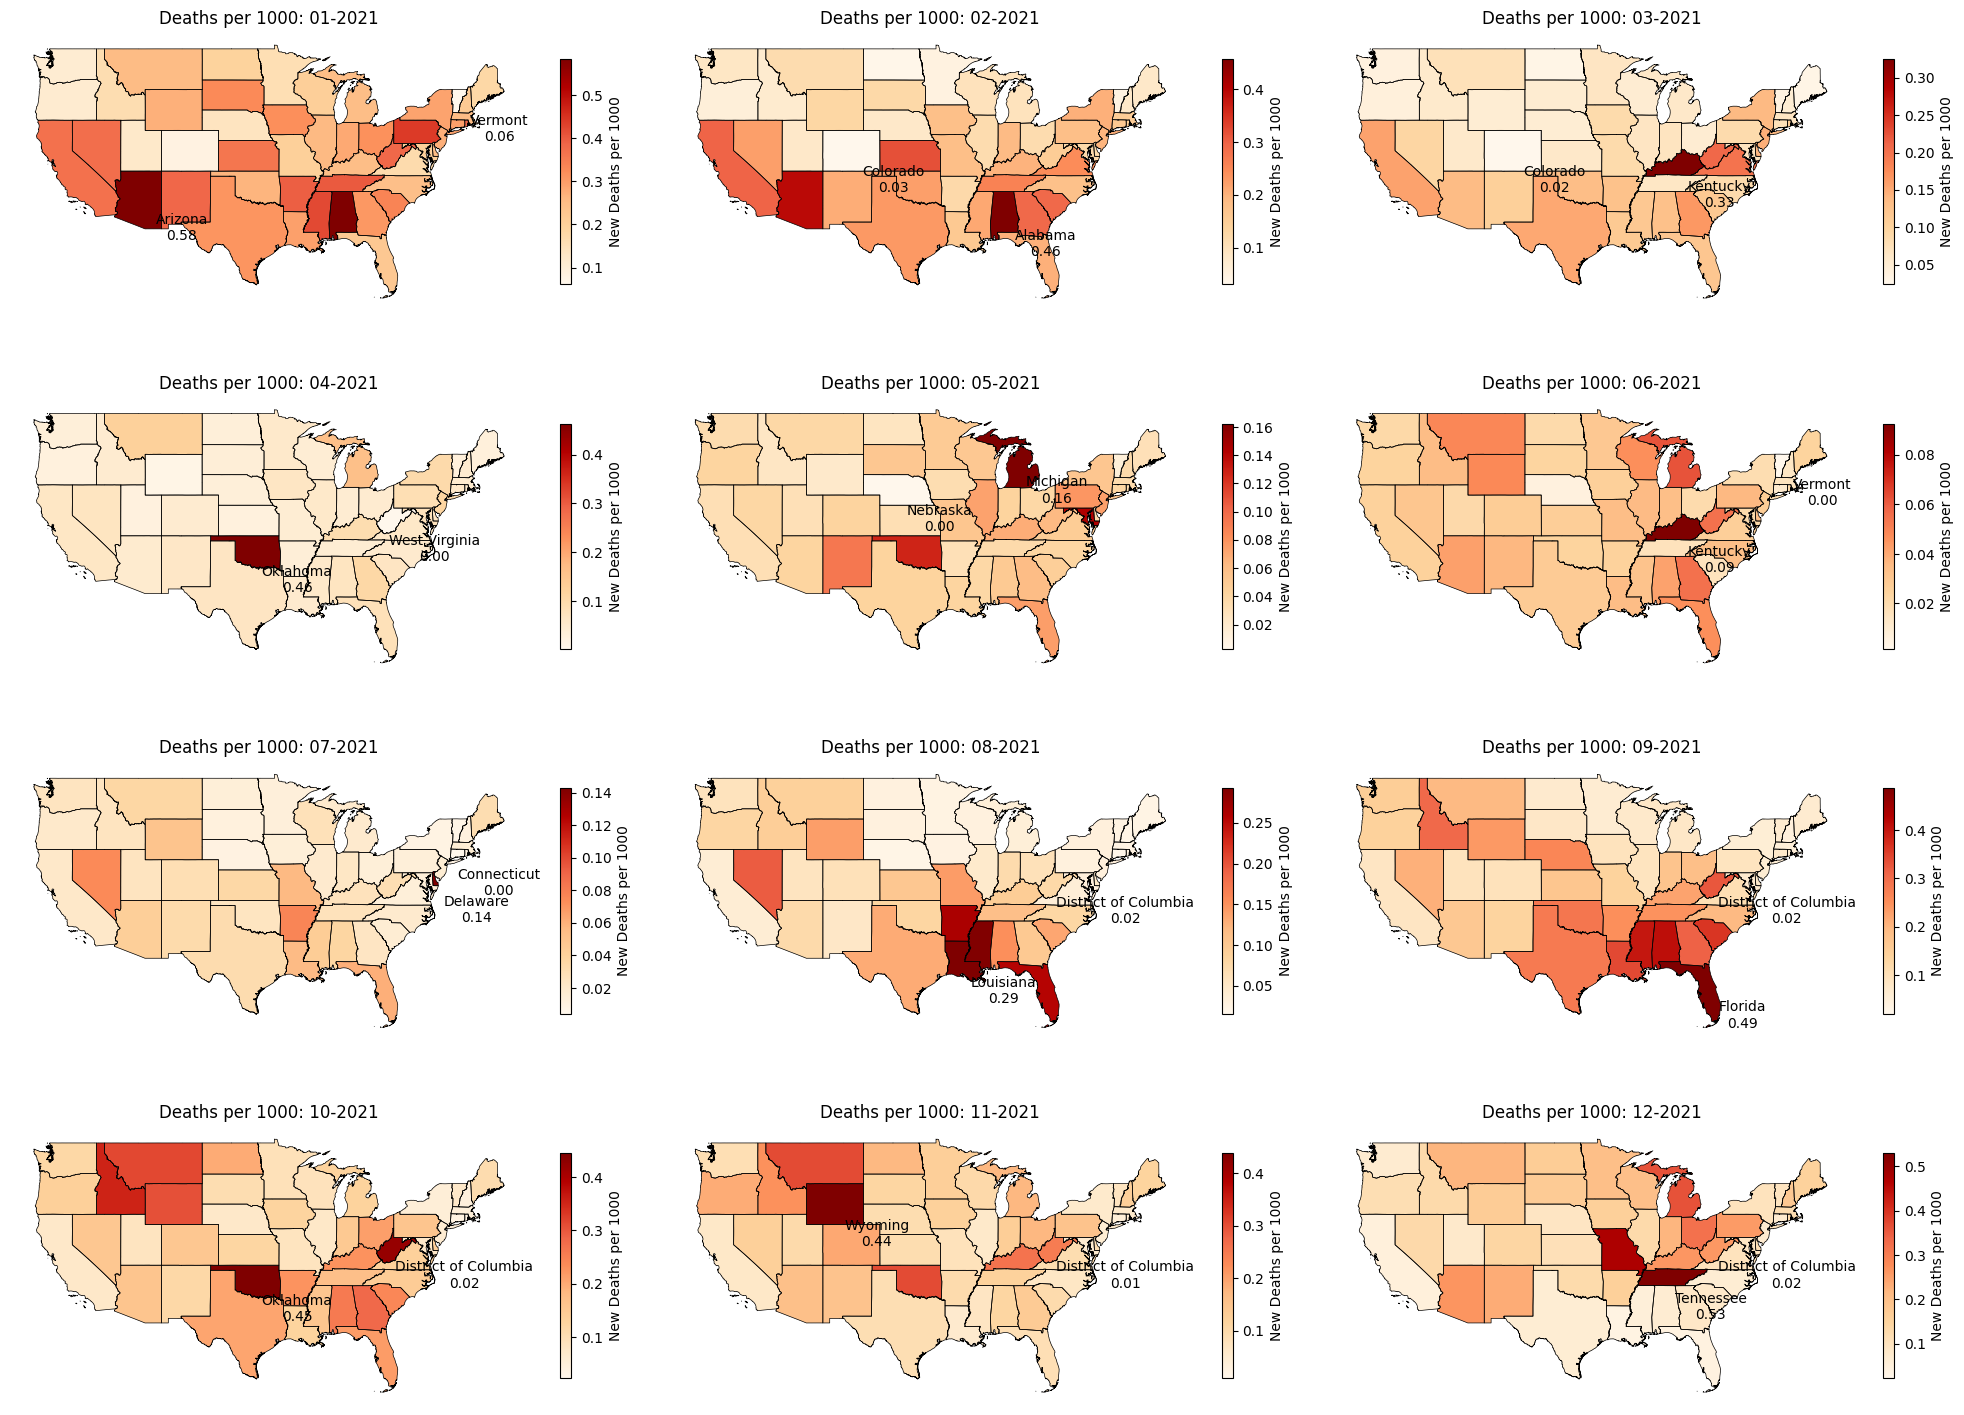

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
# plot the new death cases per 1000 population from 01-2021 to 12-2021
for i, month in enumerate(months_2021):
    gdf_plot = gdf_new[['Province_State', 'geometry', 'Population', month]].copy()
    gdf_plot = gdf_plot.assign(Density=gdf_plot[month] / gdf_plot['Population'] * 1000)

    gdf_plot.plot(ax=ax[i], column='Density', cmap='OrRd', legend=True,
                  legend_kwds={"label": "New Deaths per 1000", "shrink": 0.6})
    gdf_death.boundary.plot(ax=ax[i], color='k', linewidth=0.5)

    for df_group in [gdf_plot.nlargest(1, 'Density'), gdf_plot.nsmallest(1, 'Density')]:
        for x, y, name, value in zip(df_group.geometry.centroid.x,
                                     df_group.geometry.centroid.y,
                                     df_group['Province_State'],
                                     df_group['Density']):
            ax[i].annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(30, -30),
                             textcoords="offset points", ha='center')

    ax[i].set_title(f'Deaths per 1000: {month}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

**Your Text Answer** Arizona and Vermont were major covid case hotspots at the beginning of 2021, but then it started to decrease and states like Oklohoma started to become hotspots.

The beginning hotspots where concentrated in mid-and southern states, then shifted to the East, and then Southeast and then Northwest and finally around the center with Tenesse and Dictrict of Columbia being the hotspots.

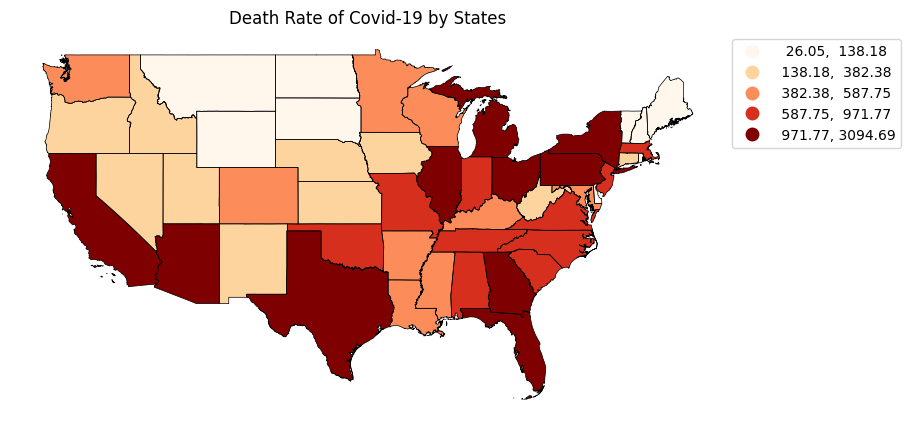

In [ ]:
### YOUR CODE HERE ###

gdf_death_rate = gdf_death.copy()

time_cols = [col for col in gdf_death_rate.columns if col not in ['Province_State', 'geometry', 'Population']]

slopes = []

for i, row in gdf_death_rate.iterrows():
    y = row[time_cols].values
    x = list(range(len(y)))
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)

    numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
    denominator = sum((xi - mean_x) ** 2 for xi in x)

    slope = numerator / denominator if denominator != 0 else 0
    slopes.append(slope)

gdf_death_rate['slope'] = slopes

ax = gdf_death_rate.plot(figsize=(10, 5), column='slope', cmap='OrRd',
                         legend=True, scheme='quantiles',
                         legend_kwds={"bbox_to_anchor": (1, 1),
                                      "loc": "upper left",
                                      })

gdf_death_rate.boundary.plot(ax=ax, color='k', linewidth=0.5)

# Customize plot
plt.title('Death Rate of Covid-19 by States')
plt.axis('off')

plt.show()

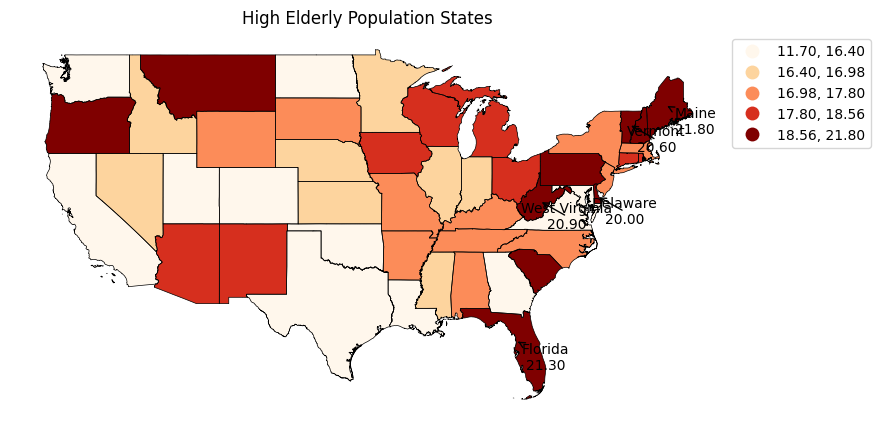

In [ ]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)
# label the top 5 states with precentage of elderly population
max_cases_state = gdf_elder.nlargest(5, 'Elderly') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Elderly']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('High Elderly Population States')
plt.axis('off')
plt.show()


**Your Text Answer** Florida seems to verify the claim since it has a large elderly population but it also has a high death rate. California is not a good example since it has a small amount of elderly population but a high mortality rate.